In [5]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pyplot as plt

In [6]:
# LOADING DATASET

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

In [35]:
# MAKING DATASET ITERABLE

batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


In [36]:
# CREATE MODEL CLASS

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function 1: 784 --> 100
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()

        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.ReLU()

        # Linear function 3 (readout): 100 --> 10
        self.fc3 = nn.Linear(hidden_dim, output_dim)  

    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)

        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)

        # Linear function 3 (readout)
        out = self.fc3(out)
        return out



In [37]:
# INSTANTIATE MODEL CLASS

input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)


In [38]:
# INSTANTIATE LOSS CLASS

criterion = nn.CrossEntropyLoss()


In [39]:
# INSTANTIATE OPTIMIZER CLASS

learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [40]:
# TRAIN THE MODEL

train_loss = []
test_loss = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()
        labels = labels

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        train_loss.append(loss)
        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()


    for i, (images, labels) in enumerate(test_loader):
                # Load images with gradient accumulation capabilities
            images = images.view(-1, 28*28).requires_grad_()

                # Forward pass only to get logits/output
            outputs = model(images)


                
            test_loss1 = criterion(outputs, labels)
            test_loss.append(test_loss1)


In [41]:
Train_result = [tensor.item() for tensor in train_loss]

Test_result = [tensor.item() for tensor in test_loss]

Text(0.5, 1.0, 'Training Loss vs Training Iterations')

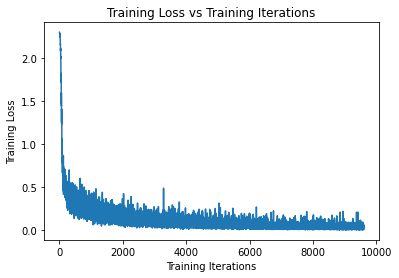

In [42]:
lst = list(range(1,3001))

plt.plot(Train_result)
plt.ylabel("Training Loss")
plt.xlabel("Training Iterations")
plt.title("Training Loss vs Training Iterations")

Text(0.5, 1.0, 'Testing Loss vs Training Iterations')

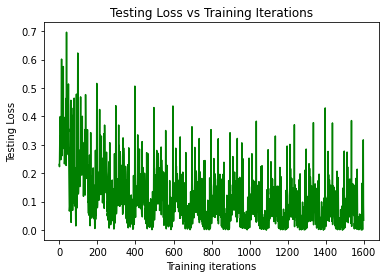

In [43]:
plt.plot(Test_result, color="green")
plt.ylabel("Testing Loss")
plt.xlabel("Training iterations")
plt.title("Testing Loss vs Training Iterations")